# Stock Price Prediction Project
> This project aims to predict stock prices using Python. We will use data from online sources, visualize the stock history, and apply machine learning techniques for forecasting.


## 1. Importing Libraries and Setting Up

We start by importing the necessary libraries for data loading, manipulation, and visualization.

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib**: For plotting and visualizing data.
- **pandas_datareader**: To fetch financial data from online sources.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

# Set the plot style for better aesthetics
plt.style.use('fivethirtyeight')

# This magic command is for Jupyter notebooks to display plots inline
%matplotlib inline

> **Note:**  
If you don’t have any of these libraries installed, you can install them using pip:

## 2. Downloading Stock Data

In this section, we'll use the `yfinance` library to fetch historical stock price data for a selected company (Google, ticker: GOOG) within a specific date range.

- **yfinance**: A popular library for downloading historical market data from Yahoo Finance.
- **datetime**: Used for handling date ranges conveniently.

In [56]:
import yfinance as yf
import datetime as dt

# Define the stock ticker symbol
stock = "GOOG"

# Set the date range for the data
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2025, 1, 1)

# Download the historical stock data from Yahoo Finance
df = yf.download(stock, start, end)

# Display the first few rows to check the downloaded data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-01-02,26.045292,26.365890,26.010056,26.253730,28951268
2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2015-01-06,24.911291,25.616755,24.866131,25.558441,57998800
2015-01-07,24.868610,25.173524,24.796649,25.161415,41301082
2015-01-08,24.947021,24.986724,24.367366,24.714266,67071641


## 3. Exploratory Data Analysis (EDA)

Let's explore the first insights into the dataset we've downloaded. This step helps us understand the structure, spot missing values, and get a statistical overview.

- **Preview the data** using `head()` and `tail()`.
- **Check the shape** to see how many rows and columns are present.
- **Inspect for missing values** to detect any data quality issues.
- **Get data types and summary** using `info()`.
- **Describe statistics** such as mean, std, min, and max for numerical columns.

In [57]:
# Show the last 5 rows of the dataset to see the most recent data
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900
2024-12-27,193.819183,196.576052,191.753543,196.246426,14693000
2024-12-30,192.470734,193.559490,190.143383,190.647813,12209500
2024-12-31,190.223282,193.030082,189.364260,192.226005,14355200


In [58]:
# Show concise summary including data types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2516 non-null   float64
 1   (High, GOOG)    2516 non-null   float64
 2   (Low, GOOG)     2516 non-null   float64
 3   (Open, GOOG)    2516 non-null   float64
 4   (Volume, GOOG)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [59]:
# Display the number of rows and columns (shape of the dataframe)
df.shape

(2516, 5)

In [60]:
# Check for missing values in each column
df.isnull().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [61]:
# Get statistical summary of numerical features (count, mean, std, min, 25%, 50%, 75%, max)
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,82.421878,83.256137,81.557650,82.370800,3.077518e+07
std,44.383097,44.864761,43.913637,44.363072,1.536820e+07
min,24.444290,24.614317,24.196646,24.548511,6.809800e+06
25%,46.256783,46.505601,45.961119,46.272082,2.121550e+07
50%,64.377827,64.783404,63.698300,64.254413,2.701925e+07
75%,120.423124,121.718481,119.526360,120.453981,3.569050e+07
max,197.934509,202.649131,196.466172,198.304075,2.232980e+08


## 4. Saving and Reloading Data

To ensure data persistence and easier future access, let's save our downloaded stock data to a CSV file and then reload it. This is helpful for large datasets or when you want to avoid downloading data every time you run the notebook.

- **reset_index**: Resets the DataFrame index, moving the date from the index into a column. This is important before saving to CSV to preserve the date information.
- **to_csv**: Saves the DataFrame to a CSV file on disk.
- **read_csv**: Reads the saved CSV file back into a new DataFrame to confirm successful storage and loading.

In [62]:
# Reset the index so the date becomes a column instead of the index (important for CSV)
df = df.reset_index()

In [63]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [64]:
# Save the DataFrame to a CSV file
df.to_csv("Google_stock_data.csv", index=False)

In [65]:
# Read the saved CSV back into a new DataFrame
data01 = pd.read_csv("Google_stock_data.csv")

In [66]:
# Display the first few rows of the reloaded data to verify
data01.head()

,Date,Close,High,Low,Open,Volume
0,NaN,GOOG,GOOG,GOOG,GOOG,GOOG
1,2015-01-02,26.045291900634766,26.365890262152053,26.01005649255029,26.253729623401174,28951268
2,2015-01-05,25.502361297607422,26.021470863061097,25.46216358448599,25.96836811788302,41196796
3,2015-01-06,24.911291122436523,25.61675482982649,24.86613110291352,25.55844109323783,57998800
4,2015-01-07,24.868610382080078,25.173524493193202,24.796649360974577,25.161414873502064,41301082


## 5. Data Visualization

Visualizing the stock data helps us better understand price trends, volatility, and trading volume over time. Here, we will use both interactive and static plots:

- **Candlestick Chart**: Provides a detailed view of price movements for each day.
- **Line Plots**: Show trends for closing, opening, high prices, and trading volume.

In [67]:
import plotly.graph_objects as go

# Candlestick Chart for stock price visualization

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [68]:
# Drop the Date column from df (already present as a column in data01)
df = df.drop(['Date'], axis=1)

# Show the first few rows to confirm
df.head()

<ipython-input-68-07d7f1e686ef>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
0,26.045292,26.365890,26.010056,26.253730,28951268
1,25.502361,26.021471,25.462164,25.968368,41196796
2,24.911291,25.616755,24.866131,25.558441,57998800
3,24.868610,25.173524,24.796649,25.161415,41301082
4,24.947021,24.986724,24.367366,24.714266,67071641


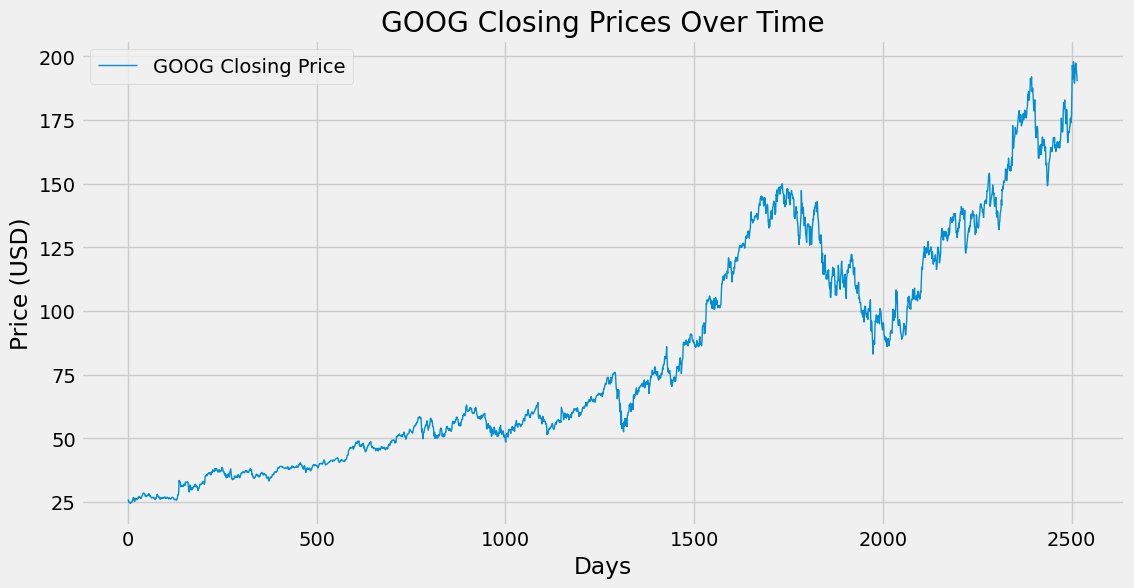

In [69]:
# Plot Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.title(f'{stock} Closing Prices Over Time')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

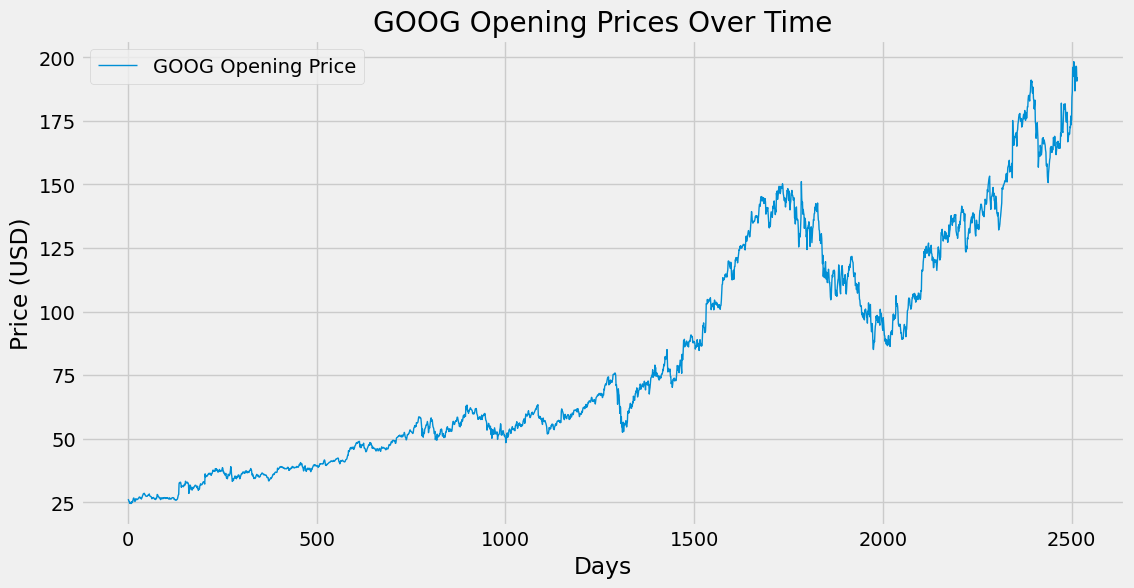

In [70]:
# Plot Opening Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label=f'{stock} Opening Price', linewidth=1)
plt.title(f'{stock} Opening Prices Over Time')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

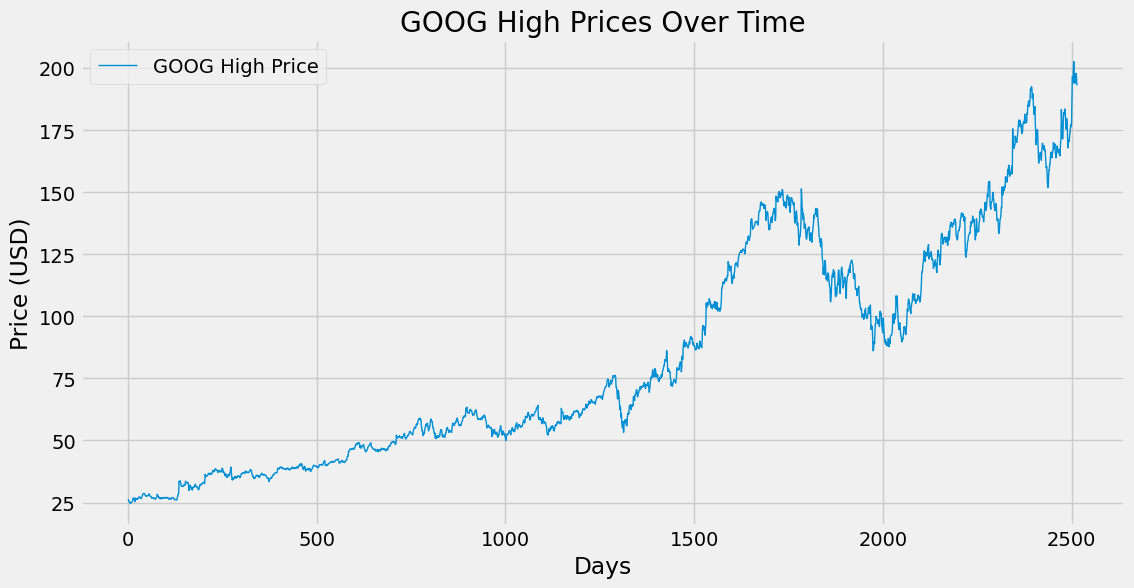

In [71]:
# Plot High Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label=f'{stock} High Price', linewidth=1)
plt.title(f'{stock} High Prices Over Time')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

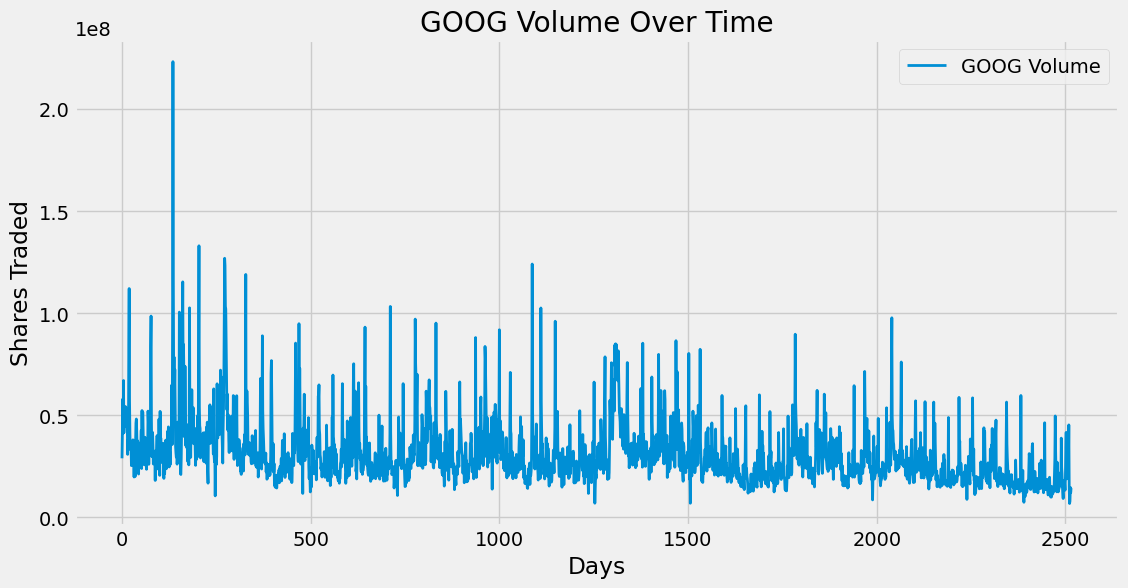

In [72]:
# Plot Volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label=f'{stock} Volume', linewidth=2)
plt.title(f'{stock} Volume Over Time')
plt.xlabel("Days")
plt.ylabel("Shares Traded")
plt.legend()
plt.show()

## 6. Moving Averages

Moving averages are commonly used in stock analysis to smooth out price trends and identify signals. Here, we demonstrate moving average calculation with a simple example and then compute 100-day and 200-day moving averages for Google’s stock price.

- **Rolling Mean**: The moving average for each point is computed as the mean of the previous *n* values.
- **Why use moving averages?** They help filter out noise and highlight long-term trends in the stock’s price.

### Example: 5-day Moving Average on Sample Data

In [73]:
# Example: Calculate the moving average for the last 5 days in a small dataset
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Calculate the mean of 5 elements (from index 2 to 6)
print("5-day average for elements 3-7:", sum(temp_data[2:7])/5)

5-day average for elements 3-7: 50.0


In [74]:
# Create a DataFrame for rolling calculations
df01 = pd.DataFrame(temp_data, columns=['Value'])

In [75]:
# Calculate the rolling mean with window size 5
print("5-day rolling mean:")
print(df01.rolling(5).mean())

5-day rolling mean:
   Value
0    NaN
1    NaN
2    NaN
3    NaN
4   30.0
5   40.0
6   50.0
7   60.0
8   70.0


### Moving Averages on Stock Data

In [76]:
# Calculate the 100-day moving average for the closing price
ma100 = df['Close'].rolling(100).mean()

In [77]:
# Display a few values of the 100-day moving average
print("100-day moving average:")
print(ma100.head(10))

100-day moving average:
Ticker  GOOG
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN


In [78]:
# Calculate the 200-day moving average for the closing price
ma200 = df['Close'].rolling(200).mean()

In [79]:
# Display a few values of the 200-day moving average
print("200-day moving average:")
print(ma200.head(10))

200-day moving average:
Ticker  GOOG
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN


## 7. Visualizing Moving Averages

Moving averages help us visualize smoothed trends in the stock price, filtering out short-term fluctuations. Here, we plot both simple and exponential moving averages alongside the actual closing price.

### 7.1. Simple Moving Averages

The **Simple Moving Average (SMA)** calculates the mean of the closing prices over a fixed window (e.g., 100 or 200 days).

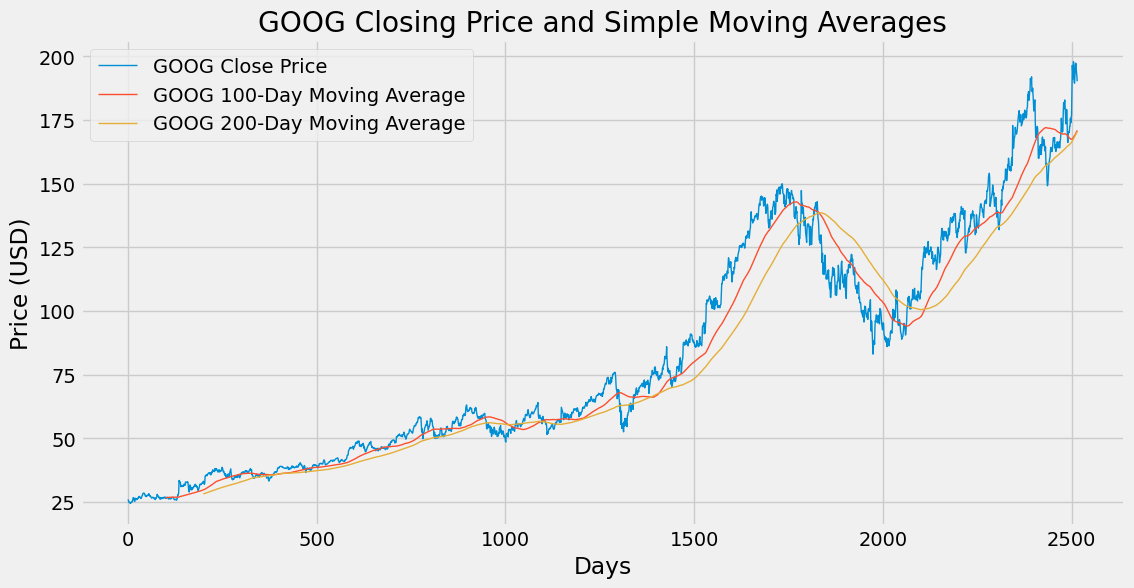

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{stock} Close Price', linewidth=1)
plt.plot(ma100, label=f'{stock} 100-Day Moving Average', linewidth=1)
plt.plot(ma200, label=f'{stock} 200-Day Moving Average', linewidth=1)
plt.title(f"{stock} Closing Price and Simple Moving Averages")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### 7.2. Exponential Moving Averages

The **Exponential Moving Average (EMA)** gives more weight to recent prices, making it more responsive to new information.

In [81]:
# Calculate Exponential Moving Averages
ema100 = df['Close'].ewm(span=100, adjust=False).mean()
ema200 = df['Close'].ewm(span=200, adjust=False).mean()

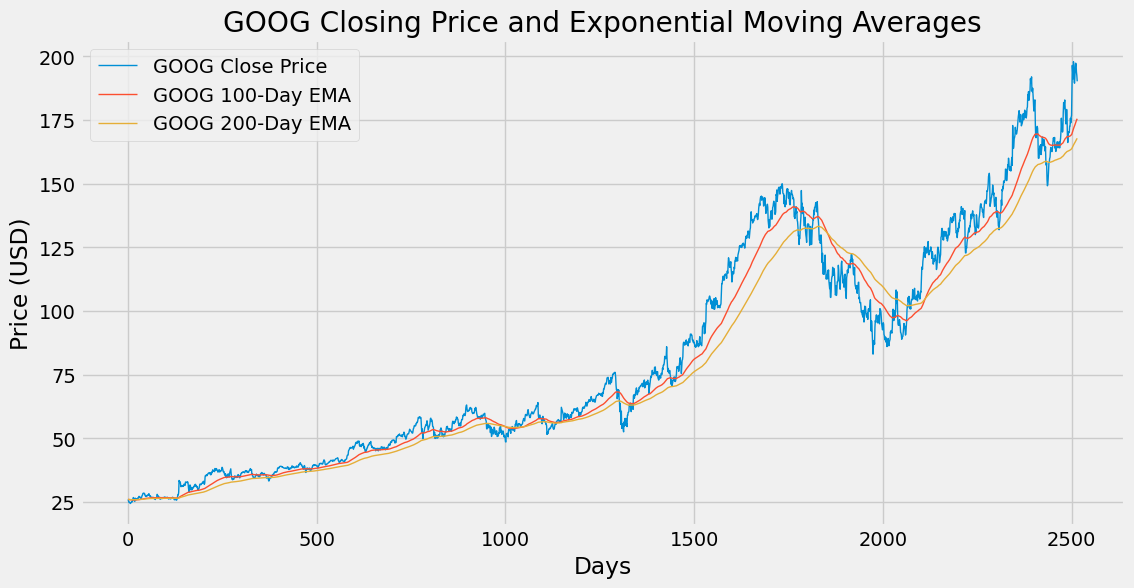

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{stock} Close Price', linewidth=1)
plt.plot(ema100, label=f'{stock} 100-Day EMA', linewidth=1)
plt.plot(ema200, label=f'{stock} 200-Day EMA', linewidth=1)
plt.title(f"{stock} Closing Price and Exponential Moving Averages")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## 8. Training and Testing Data Preparation

To train and evaluate our predictive model, we split the data into training and testing sets. We'll use a 70/30 split, where the first 70% of the data is for training and the last 30% is for testing.

### Steps:
- **Split the closing prices into training and testing sets.**
- **Scale the data to the range [0, 1]** using MinMaxScaler, which is important for many ML models (especially neural networks).
- **Create training sequences:**  
  For each point, we use the previous 100 closing prices as input features (`x_train`) and the current price as the target (`y_train`).

In [83]:
from sklearn.preprocessing import MinMaxScaler

# Split the closing price data into training (first 70%) and testing (last 30%) sets
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [84]:
print("Training data shape:", data_training.shape)
print("Testing data shape:", data_testing.shape)

Training data shape: (1761, 1)
Testing data shape: (755, 1)


In [85]:
# Scale the training data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

In [86]:
data_training_array = scaler.fit_transform(data_training)

In [87]:
print("Scaled training data shape:", data_training_array.shape)

Scaled training data shape: (1761, 1)


In [88]:
data_training_array.shape[0]

1761

In [89]:
# Prepare the training sequences
x_train = []
y_train = []

# For each entry, use the previous 100 days' closing prices as input (x), and the next day's price as output (y)
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [90]:
print("x_train shape (samples, time steps, features):", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape (samples, time steps, features): (1661, 100, 1)
y_train shape: (1661,)


## 9. Model Building and Stock Price Prediction

In this section, we construct and train a deep learning model (LSTM) to predict stock prices. We also evaluate the model’s performance by comparing predicted prices with actual prices.


### 9.1. LSTM Model Construction

We use a stacked LSTM (Long Short-Term Memory) network—a type of recurrent neural network (RNN) suitable for sequential data like stock prices.

In [92]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [93]:
# Initialize the model
model = Sequential()

# Add LSTM and Dropout layers
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [94]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

### 9.2. Model Compilation and Training

We compile the model using the Adam optimizer and Mean Squared Error loss, and train for 50 epochs.

In [95]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 127ms/step - loss: 0.0625
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0062
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0048
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0049
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0055
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0047
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0043
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0051
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0040
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0034
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0031
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0032
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0033
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0032
Ep

### 9.3. Preparing Test Data

We create test sequences, making sure to include the last 100 days of the training data to provide the necessary context for the first test prediction.

In [96]:
# Get the last 100 days from training and concatenate with testing data
past_100_days = data_training.tail(100)

In [97]:
# Use pd.concat() instead of .append() to combine the dataframes
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [98]:
final_df.head()

Ticker,GOOG
0,137.351440
1,137.445496
2,137.040405
3,137.737106
4,137.753540


In [99]:
# Prepare test input
input_data = scaler.fit_transform(final_df)

In [100]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [101]:
print("Shape of x_test:", x_test.shape)

Shape of x_test: (755, 100, 1)


### 9.4. Making Predictions and Rescaling

We use the trained model to predict prices on the test set, and rescale the predictions back to the original price range.

In [102]:
# Predict prices
y_predicted = model.predict(x_test)
print("Shape of predictions:", y_predicted.shape)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step
Shape of predictions: (755, 1)


In [103]:
# Get the scaler's scale parameter for reverse transformation
scaler_scale = scaler.scale_

In [104]:
# Adjust the scale factor (ensure this matches your scaler settings)
scaler_factor = 1 / scaler_scale[0]
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

### 9.5. Plotting Actual vs. Predicted Prices

Visualize how well the model predicts stock prices compared to the actual prices.

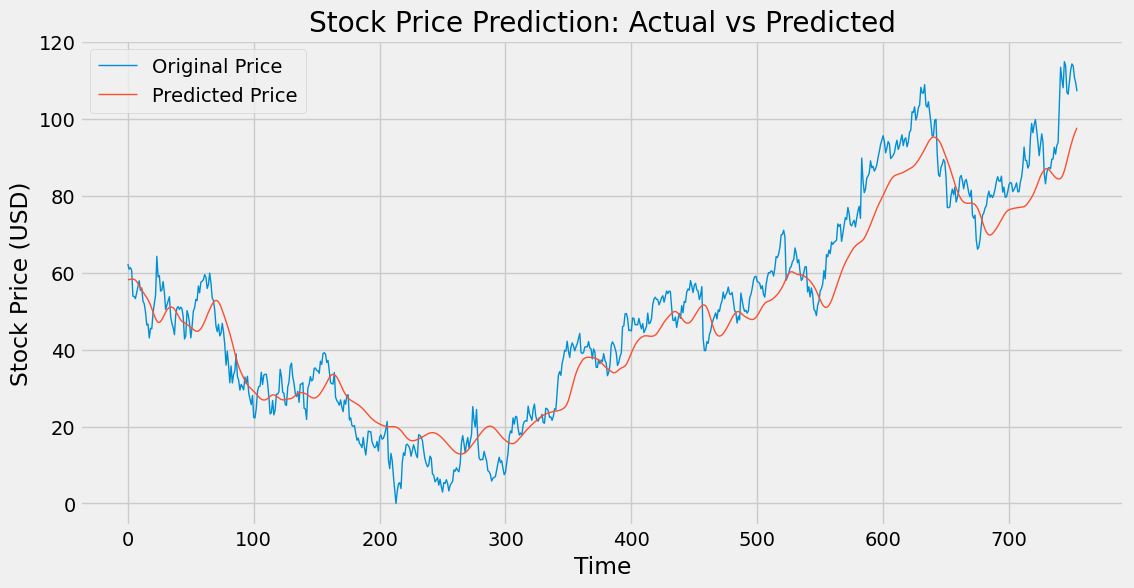

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', linewidth=1)
plt.plot(y_predicted, label='Predicted Price', linewidth=1)
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

### 9.6. Saving the Model

Save the trained model for future use.

In [106]:
model.save('stock_dl_model.h5')
print("Model saved as stock_dl_model.h5")

Model saved as stock_dl_model.h5


## 10. Conclusion

###  Summary

In this project, we built a deep learning model to predict the stock prices of Google (GOOG) using historical data. The workflow included:

- **Data Collection:** Downloaded historical stock data with `yfinance`.
- **Exploratory Data Analysis:** Explored, visualized, and cleaned the data.
- **Feature Engineering:** Calculated moving averages and other useful statistics.
- **Data Preparation:** Scaled data and created sequences for time series modeling.
- **Model Building:** Constructed a multi-layer LSTM neural network to capture temporal patterns.
- **Prediction & Evaluation:** Compared predicted stock prices with actual prices using visual plots.

## Connect with Me  

Feel free to follow me on these platforms:  

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/adilshamim8)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  